# データサイエンス超入門: 回帰演習課題

#### 学科：工学部応用化学科 
#### 学籍番号：03220724　　　 　　　　
#### 氏名：ウン　ピチポンサー　タニソーン

ある商品のレンタル数（第１列）を被説明変数、それを説明する説明変数（第２列以降）に関するデータからなるファイル（課題用データ.csv）がある。そのデータのうち、ランダムに70%を訓練データとして用い回帰を行い、その回帰結果を用いて、残りのデータ（テストデータ）の被説明変数の推定を行う。これを10回行う。その10回の推定結果と真の値の相関の平均が「0.8」を超える場合、その回帰手法のプログラム（事前事後処理や変数の選択、手法のパラメータの調整等を含む）とその出力結果を提示せよ(*)。提出資料の資料名でRとpython、いずれを用いたかが分かるようにすること。「0.8」以下の場合は、採点対象としない。

(*) 提出物：①プログラムを（必要に応じて、採点者が簡単に当該プログラムを実行して結果を確認できるよう）テキストファイルなどで、さらに、②確かに当該プログラムで提出した結果が得れることを示すスクリーンショットなどの証跡、③手法の概要説明を別ファイルで提出する。ファイル圧縮はしない。



There is a file (data for assignment.csv) consisting of data on the number of Count of a certain product (column 1) as the explained variable and the explanatory variables that explain it (column 2 and beyond). 

We randomly select 70% of the data and run a regression using the training data, and then use the regression results to estimate the explained variable for the remaining data (test data).

This is done 10 times. 

If the average of the correlation between the estimation results and the true value exceeds "0.8" in those 10 times, present the program of the regression method (including pre-post processing, selection of variables, adjustment of parameters of the method, etc.) and its output results (*). The name of the document in the submission should indicate whether R, python, or both were used. If the score is less than "0.8", it will not be scored.

(*) Submissions:

(1) The program (if necessary, so that the scorer can easily run the program and check the results) should be submitted as a text file, etc. 

In addition, 

(2) a screen shot or other evidence showing that the program does indeed produce the submitted results, and 

(3) a brief description of the methodology should be submitted as a separate file. No file compression is to be used.

# Importing libraries

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, RepeatedKFold
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import scipy.stats as stats
import warnings
pd.set_option("display.max_columns", 100)

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

# Reading the data

In [2]:
data = pd.read_csv("課題用データ.csv", encoding = "shift-jis")

In [3]:
data.head()

,Count,Hour,Temperature(ｰC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(ｰC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday


In [4]:
data.head()

,Count,Hour,Temperature(ｰC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(ｰC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Count                      8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(ｰC)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(ｰC)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
dtypes: float64(6), int64(4), object(2)
memory usage: 821.4+ KB


In [6]:
col_names=list(data.columns)
for index,col_name in enumerate(col_names):
    print(index ," :" ,col_name)

0  : Count
1  : Hour
2  : Temperature(ｰC)
3  : Humidity(%)
4  : Wind speed (m/s)
5  : Visibility (10m)
6  : Dew point temperature(ｰC)
7  : Solar Radiation (MJ/m2)
8  : Rainfall(mm)
9  : Snowfall (cm)
10  : Seasons
11  : Holiday


# Rename the columns 

In [7]:
data=data.rename(columns={col_names[2]: "Temperature(C)", col_names[3]: "humidity(%)",col_names[4]:"Wind Speed(m/s)",\
              col_names[5]:"Visibility(10m)",col_names[6]:"Dew Temperature(C)"})

In [8]:
data.columns

Index(['Count', 'Hour', 'Temperature(C)', 'humidity(%)', 'Wind Speed(m/s)',
       'Visibility(10m)', 'Dew Temperature(C)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday'],
      dtype='object')

# Checking Null Values

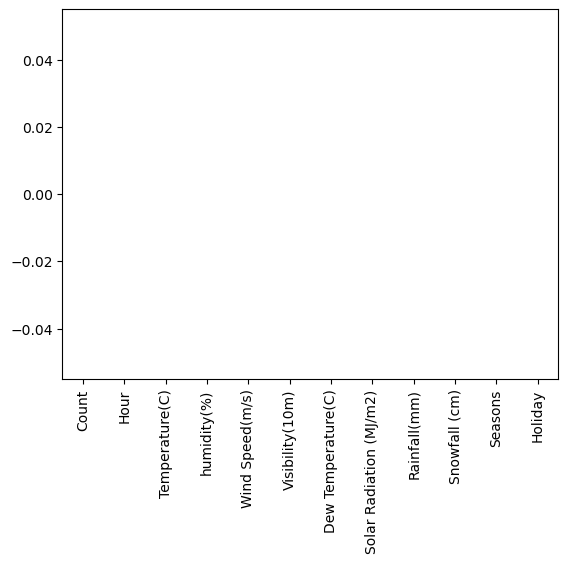

In [9]:
data.isna().sum().plot(kind="bar")
plt.show()

In [10]:
data.isna().sum()

Count                      0
Hour                       0
Temperature(C)             0
humidity(%)                0
Wind Speed(m/s)            0
Visibility(10m)            0
Dew Temperature(C)         0
Solar Radiation (MJ/m2)    0
Rainfall(mm)               0
Snowfall (cm)              0
Seasons                    0
Holiday                    0
dtype: int64

# Checking the type of Data

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Count                    8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(C)           8760 non-null   float64
 3   humidity(%)              8760 non-null   int64  
 4   Wind Speed(m/s)          8760 non-null   float64
 5   Visibility(10m)          8760 non-null   int64  
 6   Dew Temperature(C)       8760 non-null   float64
 7   Solar Radiation (MJ/m2)  8760 non-null   float64
 8   Rainfall(mm)             8760 non-null   float64
 9   Snowfall (cm)            8760 non-null   float64
 10  Seasons                  8760 non-null   object 
 11  Holiday                  8760 non-null   object 
dtypes: float64(6), int64(4), object(2)
memory usage: 821.4+ KB


# Statitical description of the features

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind Speed(m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility(10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew Temperature(C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


# Correlations between variables

<AxesSubplot:>

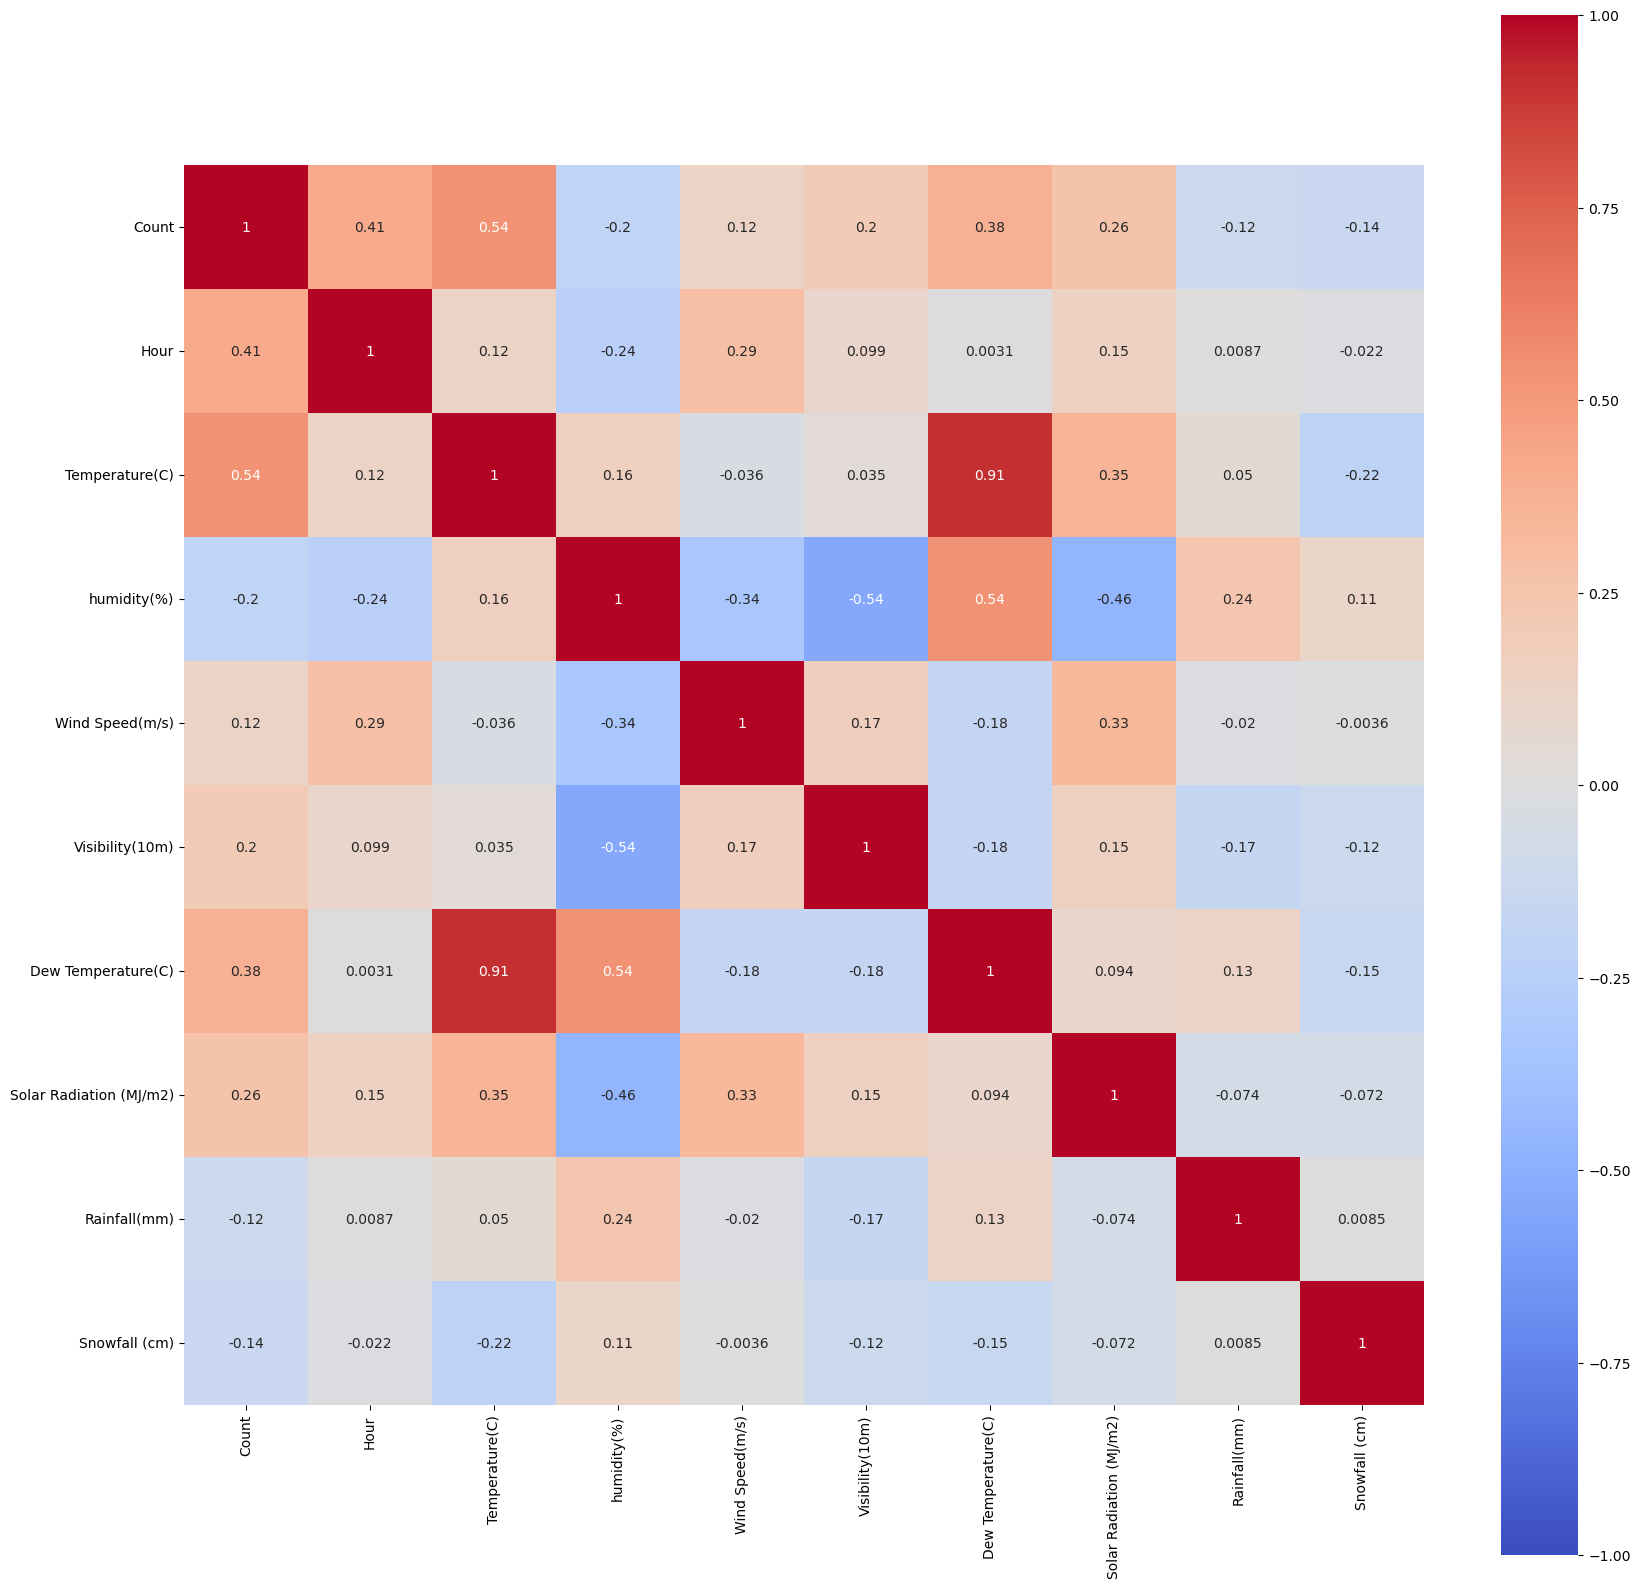

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True)

#  Sorted correlation of variables to the target

In [14]:
df1Corr=pd.DataFrame(data.corr().unstack().sort_values(ascending=False)['Count'],columns=['Correlation to the target'])
df1Corr.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Correlation to the target
Count,1.000000
Temperature(C),0.538558
Hour,0.410257
Dew Temperature(C),0.379788
Solar Radiation (MJ/m2),0.261837
Visibility(10m),0.199280
Wind Speed(m/s),0.121108
Rainfall(mm),-0.123074
Snowfall (cm),-0.141804
humidity(%),-0.199780


# Plotting variables to the target

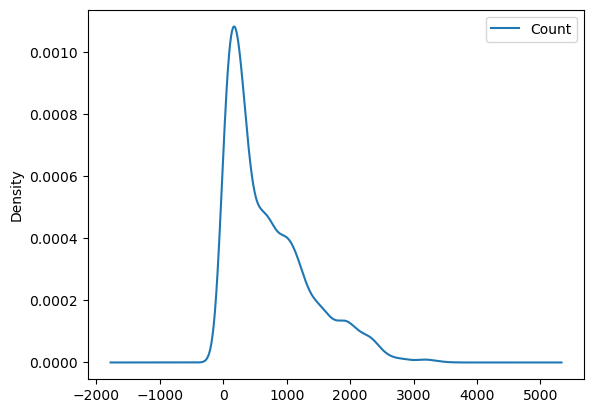

In [15]:
data.plot(y='Count',kind='kde');

# Seasons with most ¶

In [16]:
df1VizSeasons=pd.DataFrame(data.groupby('Seasons').sum()['Count'].sort_values(ascending=False))
df1VizSeasons.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Count
Seasons,
Summer,2283234
Autumn,1790002
Spring,1611909
Winter,487169


# Checking the link to solar radiation

In [17]:
df1VizSolarRadiation=pd.DataFrame(data.groupby('Seasons').sum()['Solar Radiation (MJ/m2)'].sort_values(ascending=False))
df1VizSolarRadiation.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Solar Radiation (MJ/m2)
Seasons,
Summer,1680.850000
Spring,1520.840000
Autumn,1139.650000
Winter,644.070000


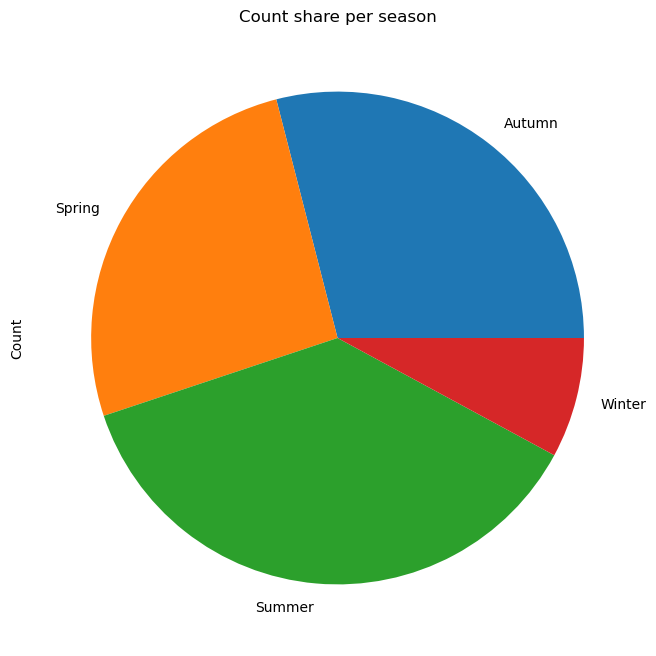

In [18]:
plt.figure(figsize=(9,8))
data.groupby('Seasons').sum()['Count'].plot.pie();
plt.title("Count share per season");

#Count vs Solar radiation

<AxesSubplot:>

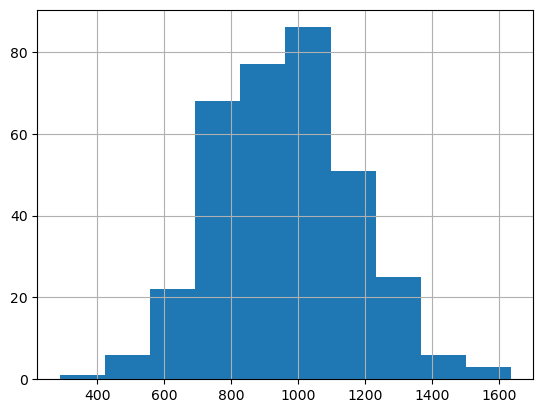

In [19]:
data.groupby('Solar Radiation (MJ/m2)').mean()['Count'].hist()

# CheckingCount per hours

<AxesSubplot:xlabel='Hour'>

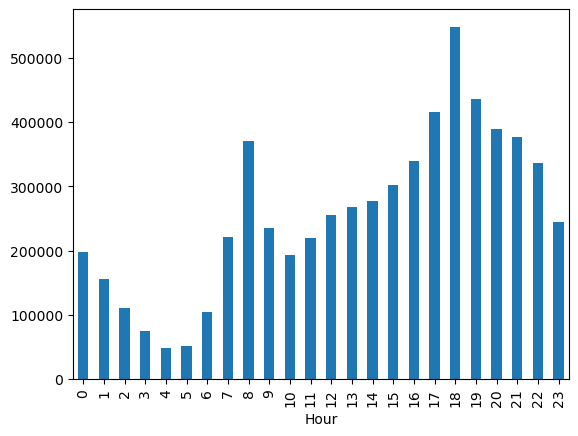

In [20]:
data.groupby('Hour').sum()['Count'].plot.bar()

# Temperature vsCount

<AxesSubplot:xlabel='Temperature(C)'>

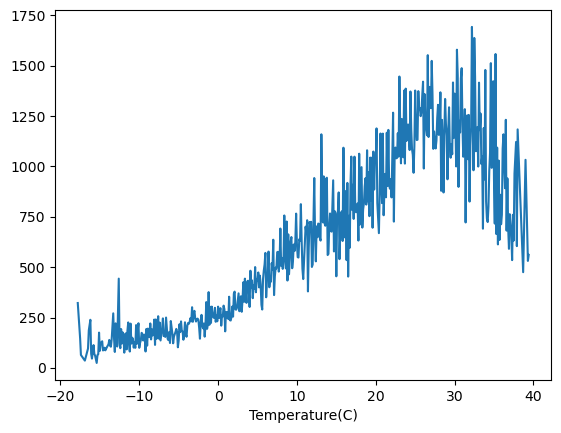

In [21]:
data.groupby('Temperature(C)').mean()['Count'].plot()

# Rain vsCount

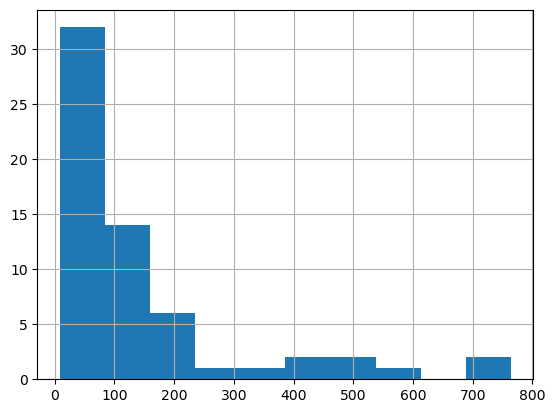

In [22]:
data.groupby('Rainfall(mm)').mean()['Count'].hist();

# Snowfall vsCount

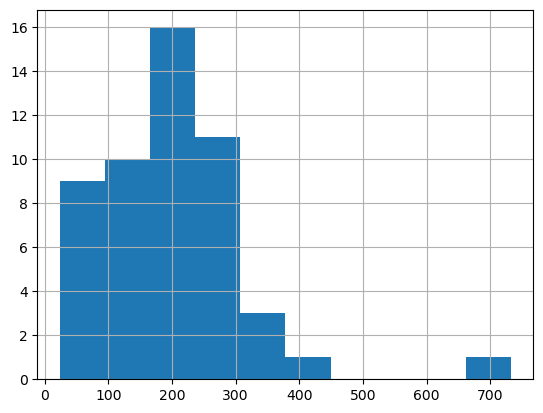

In [23]:
data.groupby('Snowfall (cm)')['Count'].mean().hist();

# Check the outliers of Data

In [24]:
features_plot=['Count',  'Temperature(C)', 'humidity(%)',
       'Wind Speed(m/s)', 'Visibility(10m)', 'Dew Temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

In [25]:
data[features_plot].describe()

,Count,Temperature(C),humidity(%),Wind Speed(m/s),Visibility(10m),Dew Temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


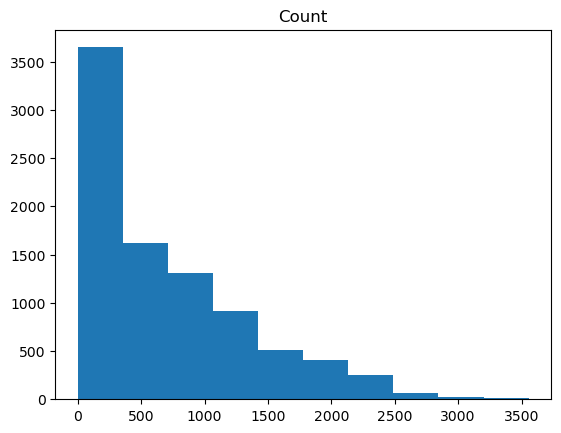

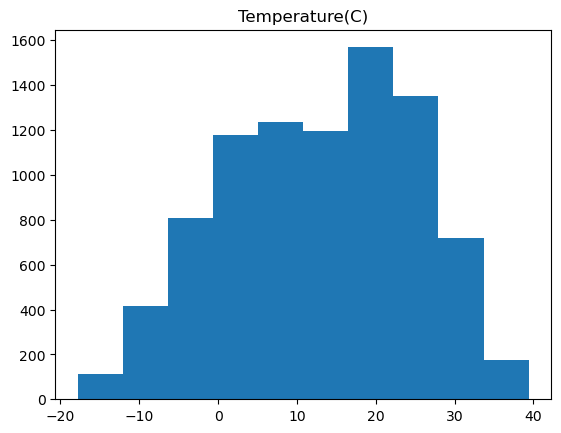

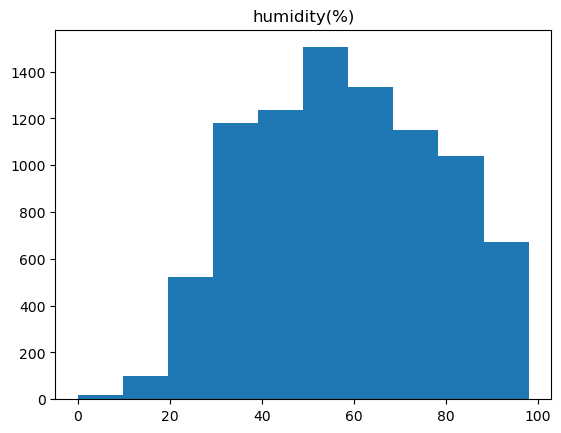

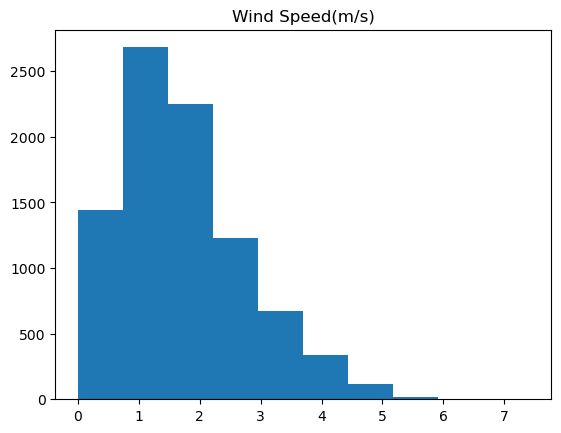

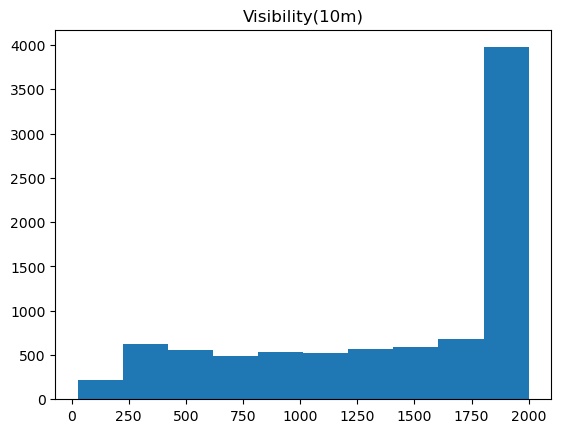

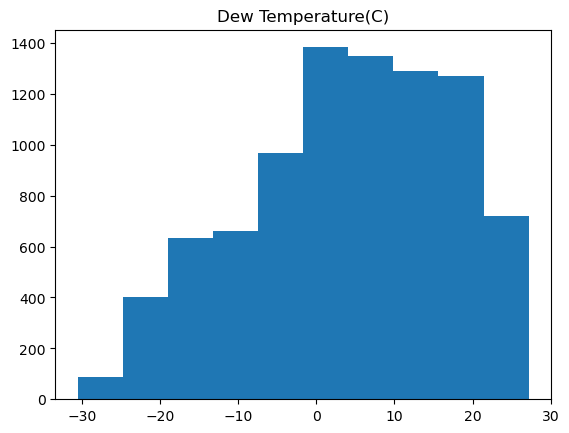

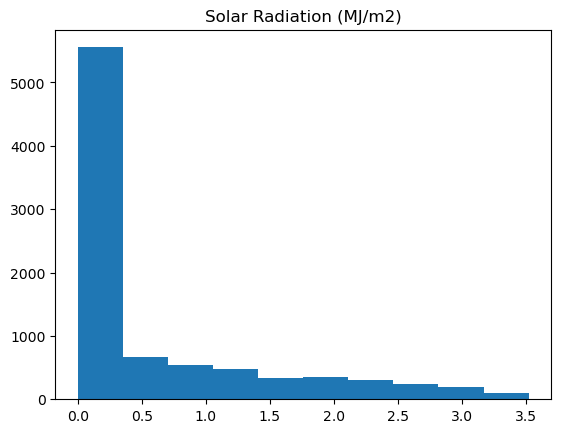

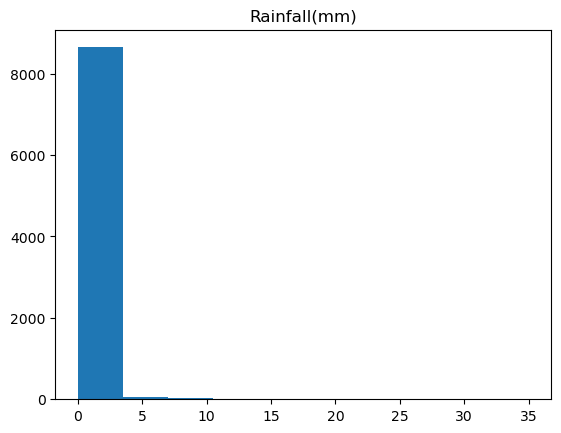

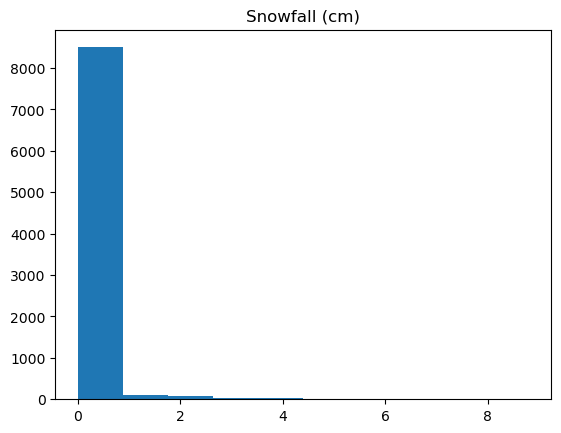

In [26]:
def my_plot(feature):
    plt.hist(data[feature])
    plt.title(feature)
    plt.show()
        
for i in features_plot:
    my_plot(i)

In [27]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins='auto')
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

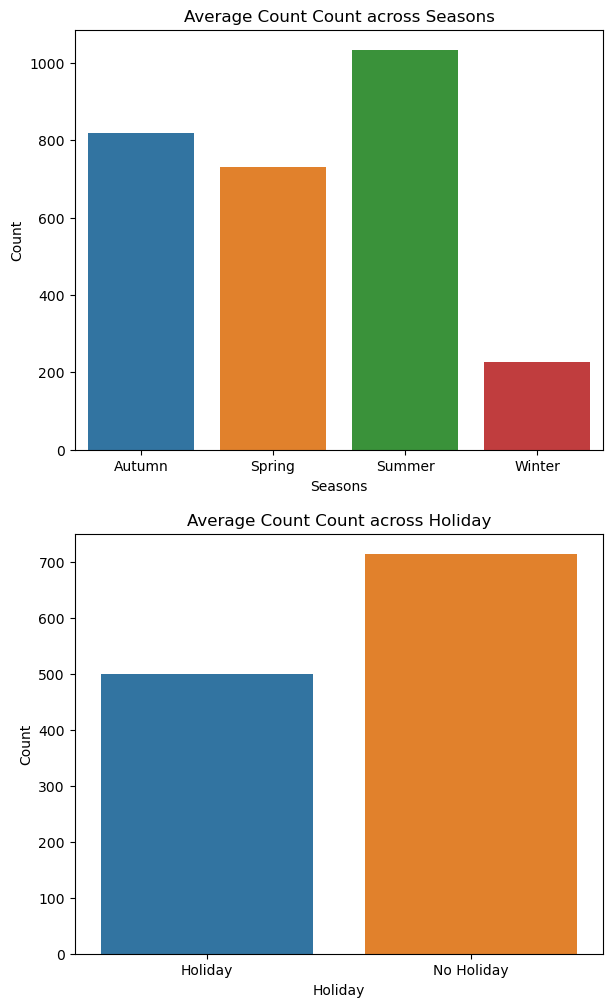

In [28]:
# Average values across each of the categorical columns 
fig = plt.figure(figsize=(15, 12))
axes = fig.add_subplot(2, 2, 1)
group_season = pd.DataFrame(data.groupby(['Seasons'])['Count'].mean()).reset_index()
sns.barplot(data=group_season, x='Seasons', y='Count', ax=axes)
axes.set(xlabel='Seasons', ylabel='Count', title='Average Count Count across Seasons')

axes = fig.add_subplot(2, 2, 3)
group_season = pd.DataFrame(data.groupby(['Holiday'])['Count'].mean()).reset_index()
sns.barplot(data=group_season, x='Holiday', y='Count', ax=axes)
axes.set(xlabel='Holiday', ylabel='Count', title='Average Count Count across Holiday')
plt.show()

# Count vs Temperature, Humidity and Windspeed

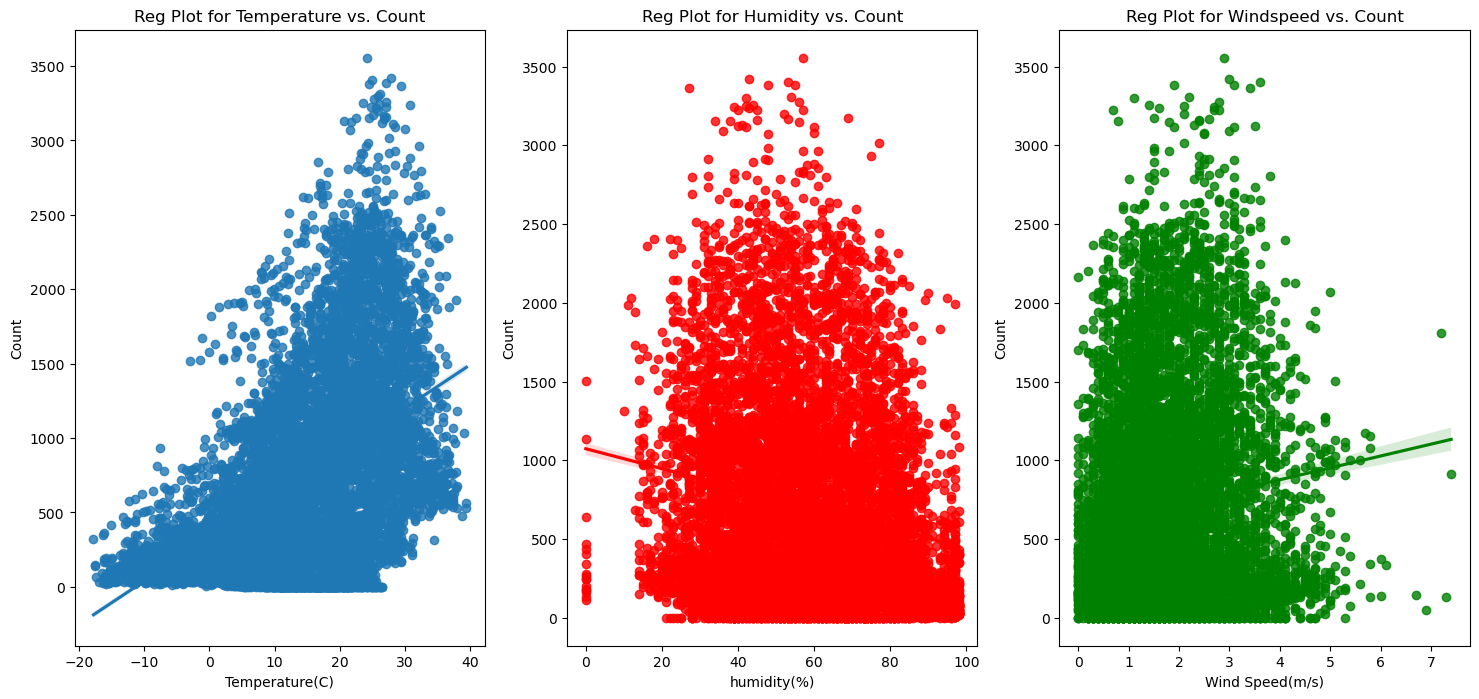

In [29]:
# Regression Plots with respect to Temperature, Humidity and Windspeed
fig = plt.figure(figsize=(18, 8))
axes = fig.add_subplot(1, 3, 1)
sns.regplot(data=data, x='Temperature(C)', y='Count',ax=axes)
axes.set(title='Reg Plot for Temperature vs. Count')
axes = fig.add_subplot(1, 3, 2)
sns.regplot(data=data, x='humidity(%)', y='Count',ax=axes, color='r')
axes.set(title='Reg Plot for Humidity vs. Count')
axes = fig.add_subplot(1, 3, 3)
sns.regplot(data=data, x='Wind Speed(m/s)', y='Count',ax=axes, color='g')
axes.set(title='Reg Plot for Windspeed vs. Count')
plt.show()

# Showing the distribution of categorical variables

# Count

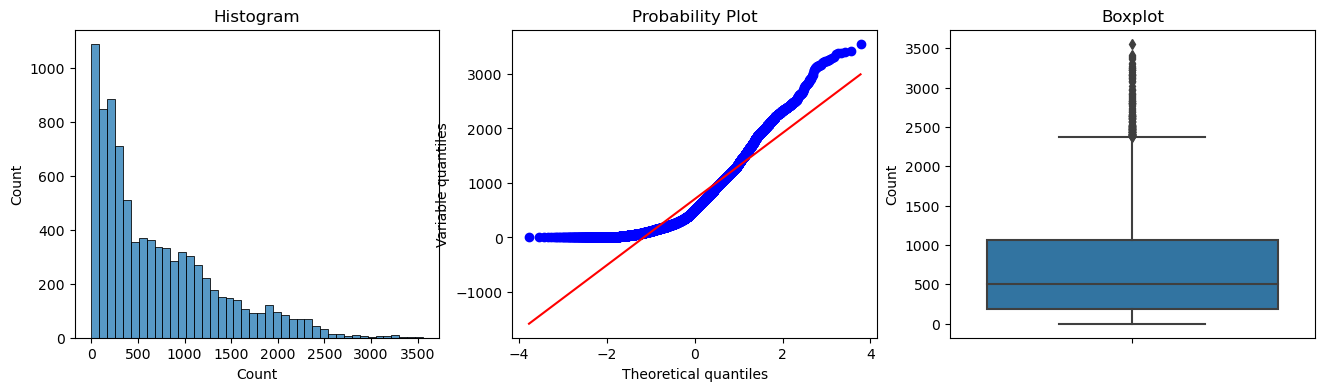

In [30]:
diagnostic_plots(data, 'Count')

# Temperatures

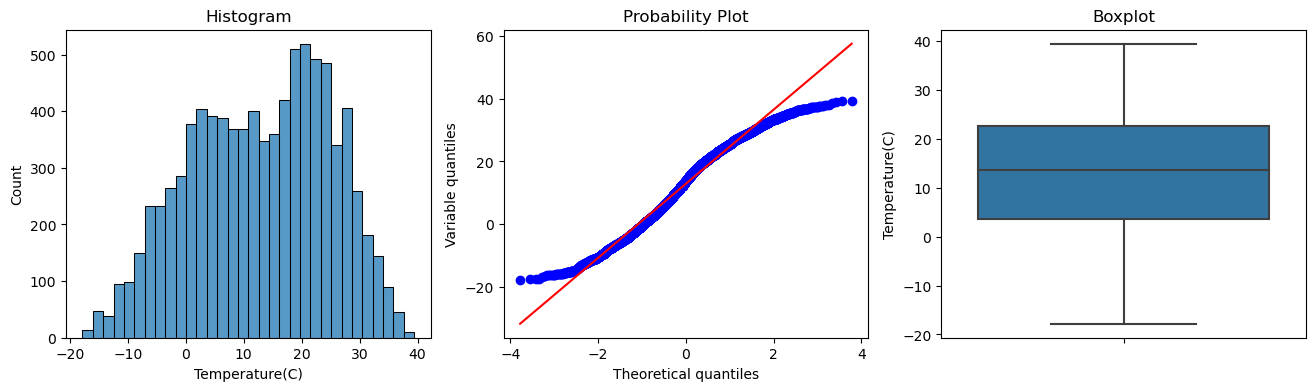

In [31]:
#showing distribution for temperature
diagnostic_plots(data, 'Temperature(C)')

# Humidity

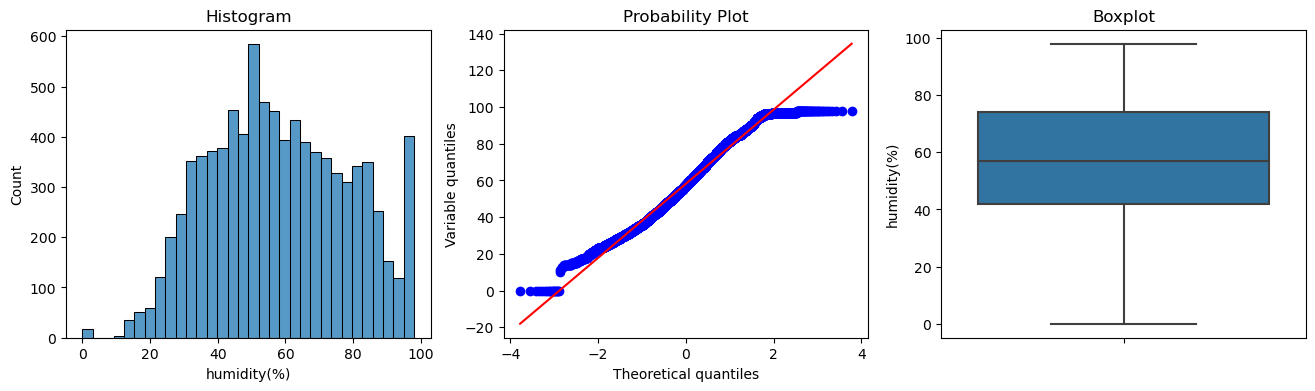

In [32]:
diagnostic_plots(data, 'humidity(%)')

# Wind Speed

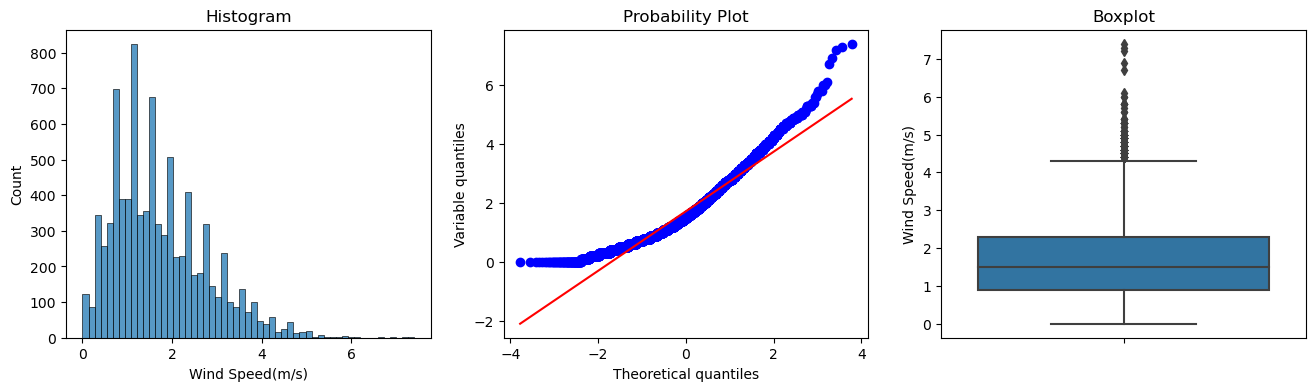

In [33]:
diagnostic_plots(data, 'Wind Speed(m/s)')

# Visibility

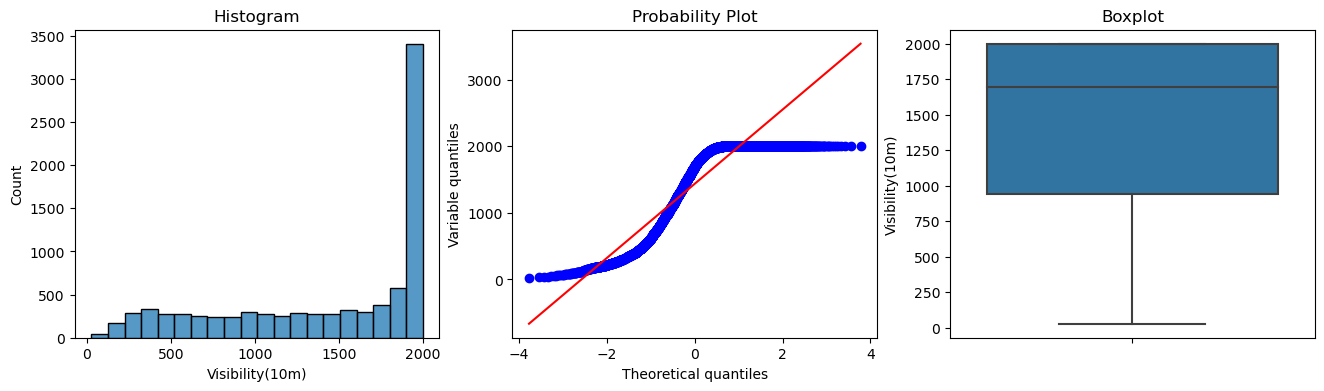

In [34]:
diagnostic_plots(data, 'Visibility(10m)')

# Dew Temperature

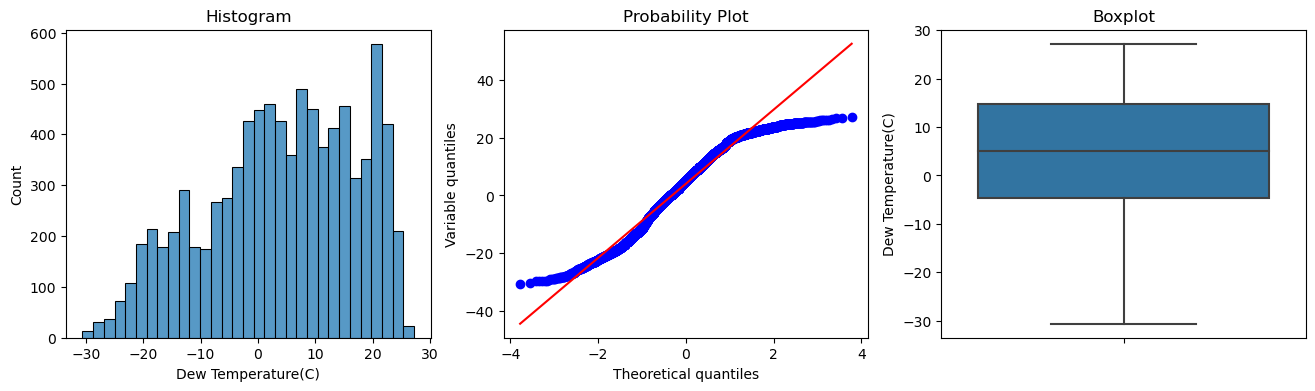

In [35]:
diagnostic_plots(data, 'Dew Temperature(C)')

# Solar Radiation

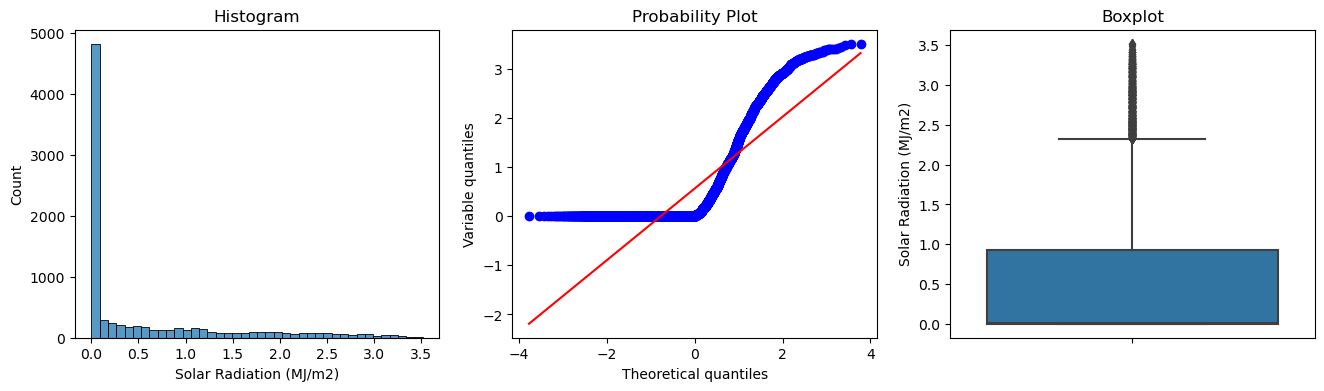

In [36]:
diagnostic_plots(data, 'Solar Radiation (MJ/m2)')

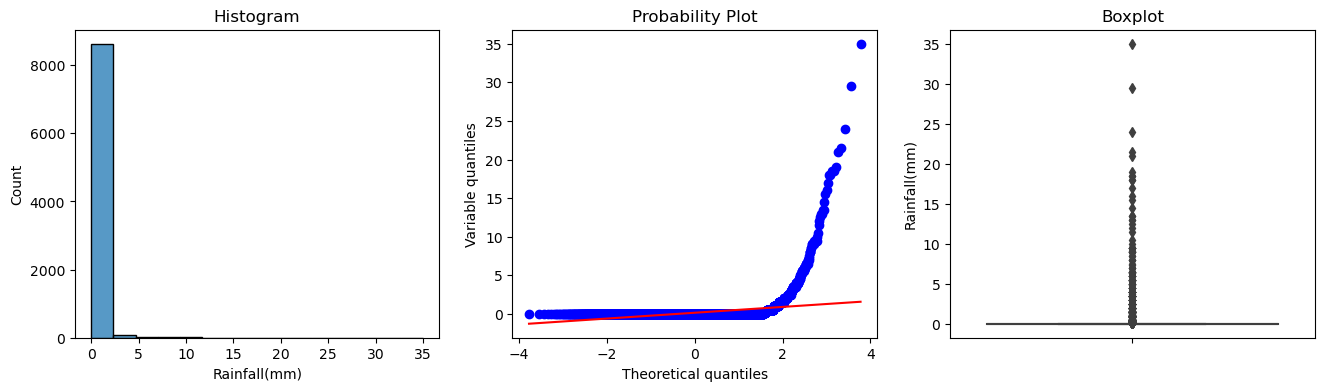

In [37]:
diagnostic_plots(data,'Rainfall(mm)')

# Snowfall

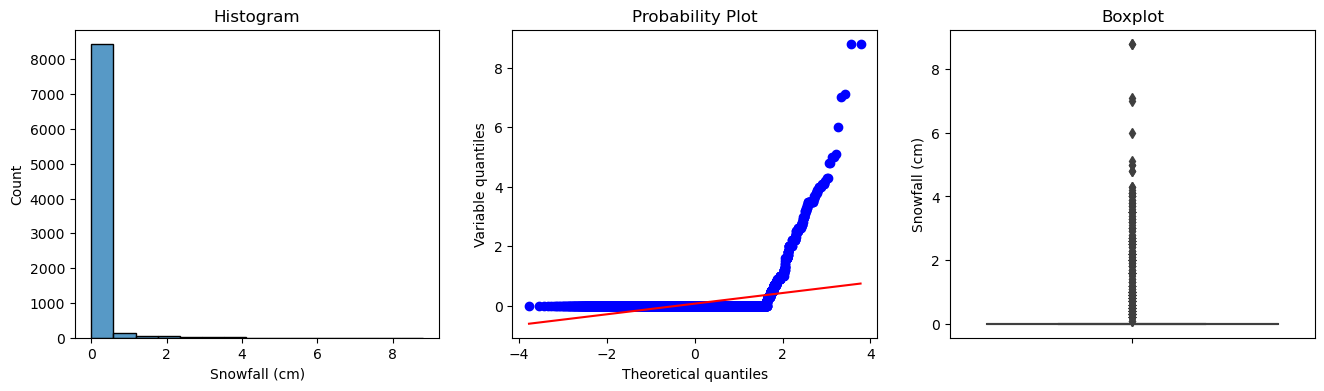

In [38]:
diagnostic_plots(data,'Snowfall (cm)')

In [39]:
data[data['Snowfall (cm)']>0].shape

(443, 12)

In [40]:
data.shape   # the data size is much larger than number of outliers in data

(8760, 12)

## Handling Outliers

In [41]:
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [42]:
#Finding upper and lower limt for windspeed
RM_upper_limit, RM_lower_limit = find_skewed_boundaries(data, 'Wind Speed(m/s)', 1.5)
RM_upper_limit, RM_lower_limit

(4.3999999999999995, -1.1999999999999997)

In [43]:
# replace the outliers of windspeed by the maximum and minimum limit

data['Wind Speed(m/s)']= np.where(data['Wind Speed(m/s)'] > RM_upper_limit, RM_upper_limit,
                       np.where(data['Wind Speed(m/s)'] < RM_lower_limit, RM_lower_limit,data['Wind Speed(m/s)']))

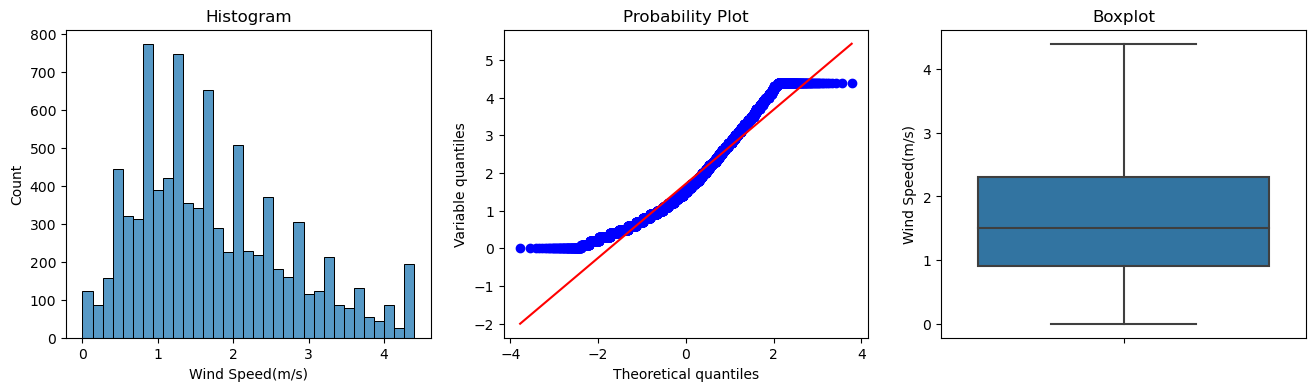

In [44]:
diagnostic_plots(data, 'Wind Speed(m/s)')

In [45]:
#Finding the maximum and minimum for solar radiation
RM_upper_limit, RM_lower_limit = find_skewed_boundaries(data, 'Solar Radiation (MJ/m2)', 1.5)
RM_upper_limit, RM_lower_limit

(2.325, -1.395)

In [46]:
 # replace the outliers by the maximum and minimum limit

data['Solar Radiation (MJ/m2)']= np.where(data['Solar Radiation (MJ/m2)'] > RM_upper_limit, RM_upper_limit,
                       np.where(data['Solar Radiation (MJ/m2)'] < RM_lower_limit, RM_lower_limit,data['Solar Radiation (MJ/m2)']))

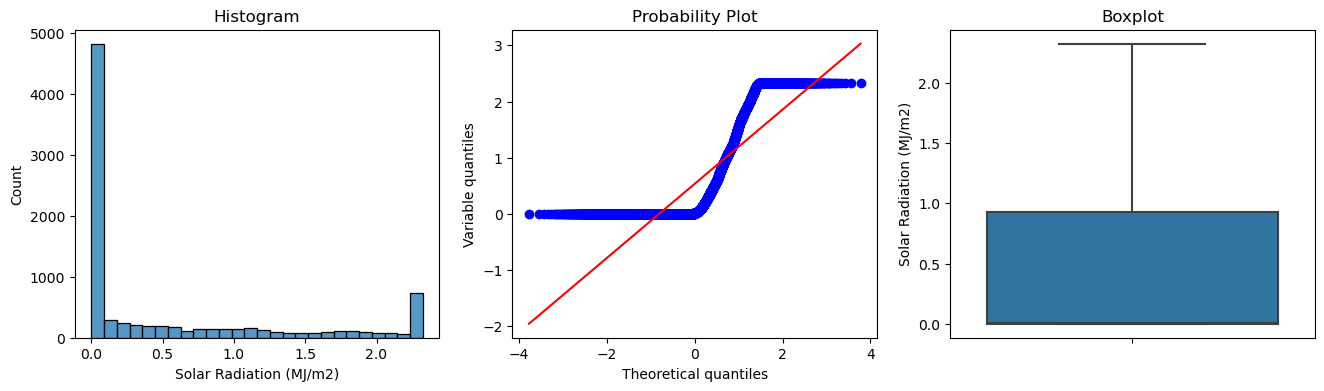

In [47]:
diagnostic_plots(data, 'Solar Radiation (MJ/m2)')

In [48]:
#Finding the maximum and minimum for solar radiation
RM_upper_limit, RM_lower_limit = find_skewed_boundaries(data, 'Snowfall (cm)', 3)
RM_upper_limit, RM_lower_limit

(0.0, 0.0)

In [49]:
data['Snowfall (cm)']= np.where(data['Snowfall (cm)'] > RM_upper_limit, RM_upper_limit,
                       np.where(data['Snowfall (cm)'] < RM_lower_limit, RM_lower_limit,data['Snowfall (cm)']))

# showing correlation between variables

<AxesSubplot:>

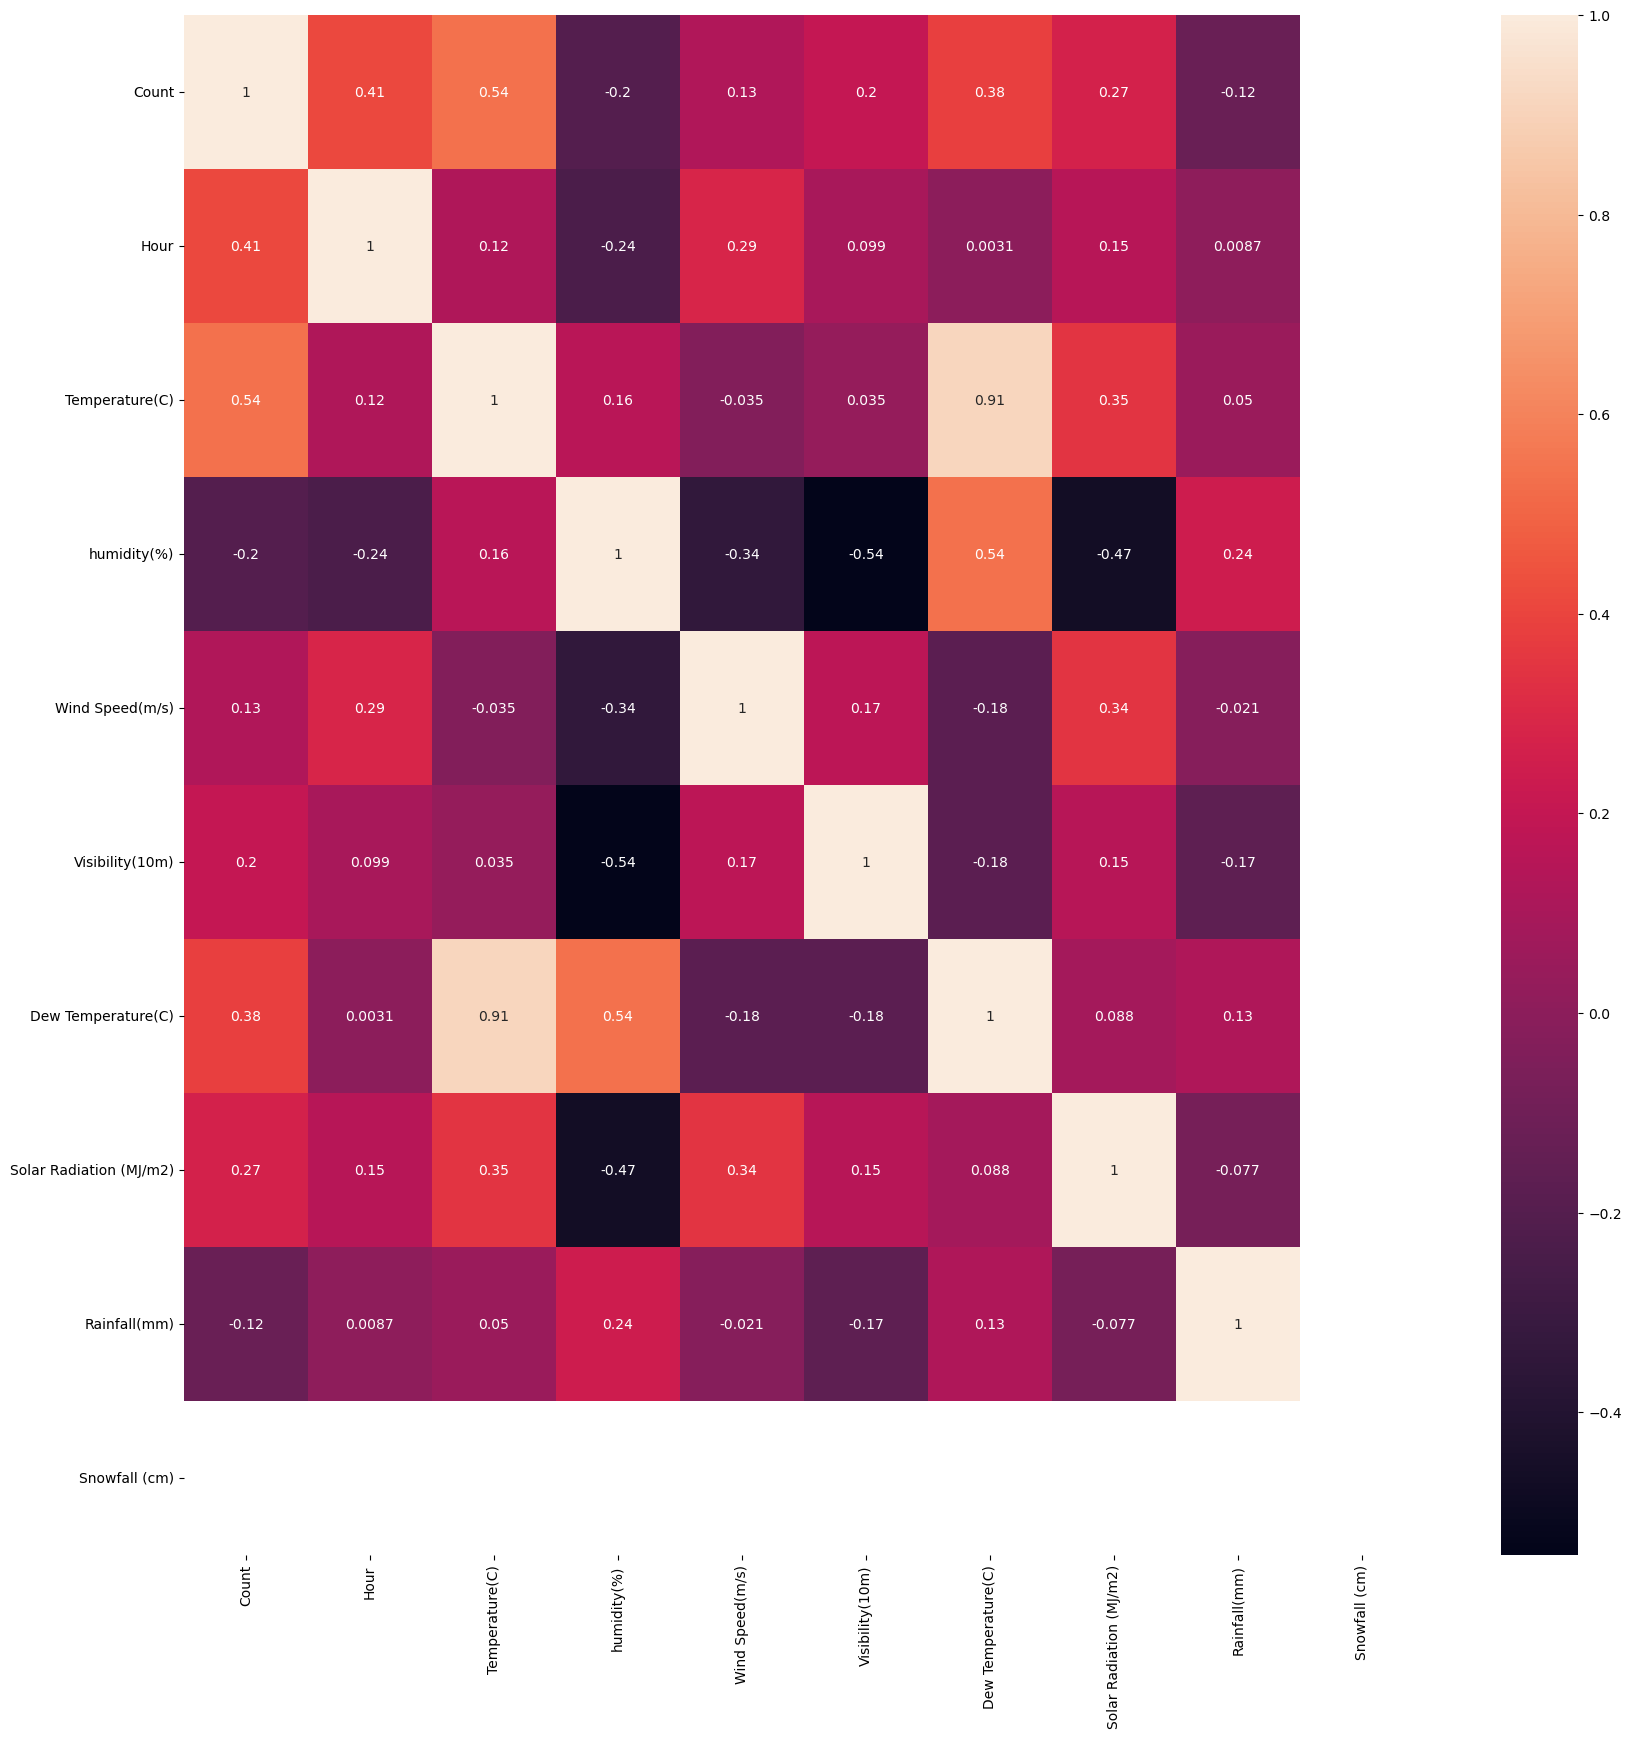

In [50]:
plt.figure(figsize=(20,20))
correlation=data.corr()
sns.heatmap(correlation,annot=True)

In [51]:
data.columns

Index(['Count', 'Hour', 'Temperature(C)', 'humidity(%)', 'Wind Speed(m/s)',
       'Visibility(10m)', 'Dew Temperature(C)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday'],
      dtype='object')

# applying additional function to data :peak,ideal,sticky

In [52]:
def additional(df):
    df['ideal'] = df[['Temperature(C)', 'Wind Speed(m/s)']].apply(lambda x: (0, 1)[x['Temperature(C)'] > 27 and x['Wind Speed(m/s)'] < 30], axis = 1)
    df['solar_visibilty']=df[['Solar Radiation (MJ/m2)', 'Visibility(10m)']].apply(lambda x: (0, 1)[x['Solar Radiation (MJ/m2)'] <0.2 and x['Visibility(10m)'] > 1600], axis = 1)
    df["windchill"]=13.12+0.6215*df['Temperature(C)']-11.37*(df['Wind Speed(m/s)']*3.6)**0.16+0.3965*df['Temperature(C)'] \
    *(df['Wind Speed(m/s)']*3.6)**0.16
    df['newweather']=17.3+df['Temperature(C)']-0.11*df['humidity(%)']+0.34*df['Wind Speed(m/s)']
    df['hour_sin'] = np.sin(2 * np.pi * df['Hour']/23.0)
    df['hour_cos'] = np.cos(2 * np.pi * df['Hour']/23.0)
    df['log_wind']=np.log1p(df['Wind Speed(m/s)'])
    df['log_hum']=np.log1p(df['humidity(%)'])
    
    return df

In [53]:
data=additional(data)

C:\Users\Thanisorn Best\AppData\Local\Temp\ipykernel_174076\2187307512.py:2: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  df['ideal'] = df[['Temperature(C)', 'Wind Speed(m/s)']].apply(lambda x: (0, 1)[x['Temperature(C)'] > 27 and x['Wind Speed(m/s)'] < 30], axis = 1)
C:\Users\Thanisorn Best\AppData\Local\Temp\ipykernel_174076\2187307512.py:3: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  df['solar_visibilty']=df[['Solar Radiation (MJ/m2)', 'Visibility(10m)']].apply(lambda x: (0, 1)[x['Solar Radiation (MJ/m2)'] <0.2 and x['Visibility(10m)'] > 1600], axis = 1)


In [54]:
data.head()

,Count,Hour,Temperature(C),humidity(%),Wind Speed(m/s),Visibility(10m),Dew Temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,ideal,solar_visibilty,windchill,newweather,hour_sin,hour_cos,log_wind,log_hum
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,0,1,-8.815617,8.778,0.000000,1.000000,1.163151,3.637586
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,0,1,-6.347921,7.892,0.269797,0.962917,0.587787,3.663562
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,0,1,-7.485388,7.350,0.519584,0.854419,0.693147,3.688879
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,0,1,-7.423287,7.006,0.730836,0.682553,0.641854,3.713572
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,0,1,-9.891173,8.122,0.887885,0.460065,1.193922,3.610918


# Showing the distribution of categorical variables

In [55]:
cat_features = data.columns[data.dtypes=='object']
cat_features=list(cat_features)

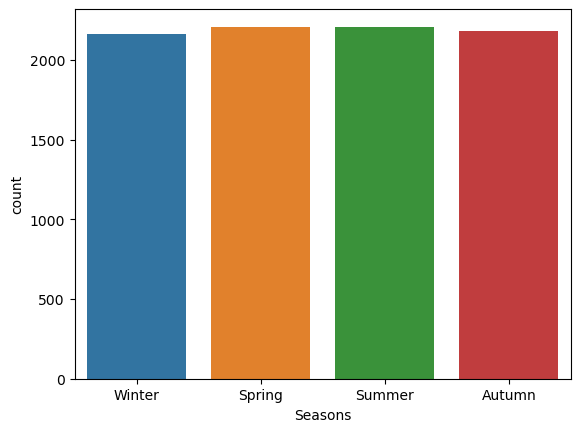

In [56]:
sns.countplot(x=cat_features[0],data=data)
plt.show()

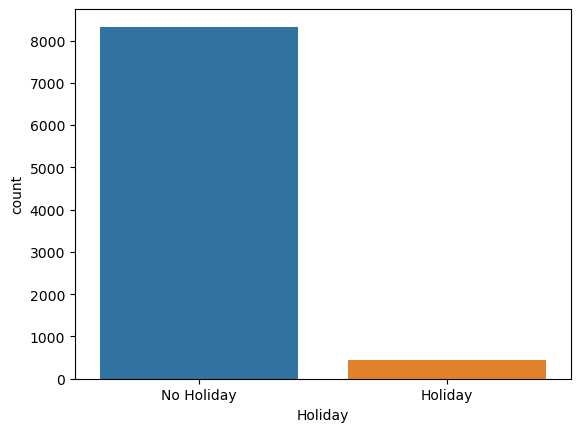

In [57]:
sns.countplot(x=cat_features[1],data=data)
plt.show()

In [58]:
def count_category(name):
    print(name)
    print(data[name].value_counts())
    print("-------------------------------------------------")
for i in cat_features:
    count_category(i)

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64
-------------------------------------------------
Holiday
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64
-------------------------------------------------


# EDA

In [59]:
count_Count_by_hour = data.groupby("Hour")["Count"].sum()
print(count_Count_by_hour)

Hour
0     197633
1     155557
2     110095
3      74216
4      48396
5      50765
6     104961
7     221192
8     370731
9     235784
10    192655
11    219311
12    255296
13    267635
14    276971
15    302653
16    339677
17    415556
18    548568
19    436229
20    390172
21    376479
22    336821
23    244961
Name: Count, dtype: int64


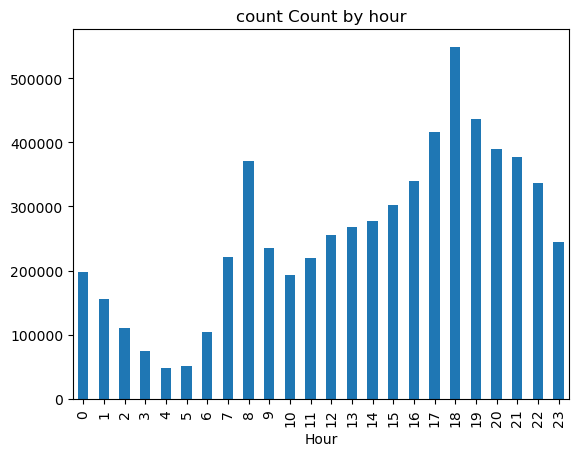

In [60]:
count_Count_by_hour.plot(kind="bar",
title="count Count by hour")
plt.savefig('count Count by hr')
plt.show()

In [61]:
count_Count_by_Holiday = data.groupby("Holiday")["Count"].sum()
print(count_Count_by_Holiday)

Holiday
Holiday        215895
No Holiday    5956419
Name: Count, dtype: int64


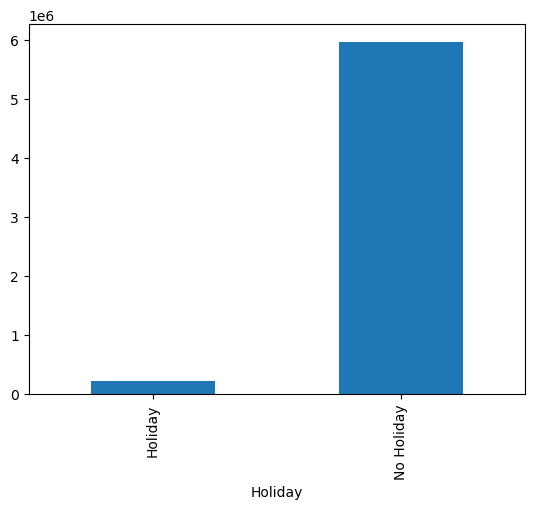

In [62]:
data.groupby("Holiday")["Count"].sum().plot(kind="bar")
plt.savefig("count Count by holiday")
plt.show()

In [63]:
count_Count_by_Season = data.groupby("Seasons")["Count"].sum()
print(count_Count_by_Season)

Seasons
Autumn    1790002
Spring    1611909
Summer    2283234
Winter     487169
Name: Count, dtype: int64


<AxesSubplot:xlabel='Seasons'>

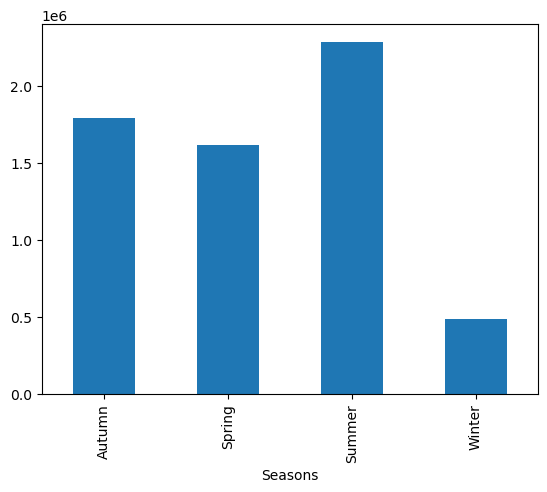

In [64]:
count_Count_by_Season.plot(kind="bar")

# Conclusion

There is a peak for Count at 8 am and 6 pm which is most probably the time a person is going to or leaving his work

Moreover, the order of season for Count(descending order) is Summer>Autumn>Spring>Winter

Count is high on the days which aren't holidays

# Rolling Mean with window of 3

In [65]:
def rolling_mean(df,cols,window=3):
    for col in cols:
        new_col = col+'_rolled'
        df[new_col] = df[col].rolling(window=window).mean()
    return df


In [66]:
data =  rolling_mean(data,['Temperature(C)','Wind Speed(m/s)','Rainfall(mm)',
                           'Snowfall (cm)','humidity(%)','Visibility(10m)'])


In [67]:
def shifting(df,cols):
    for col in cols:
        new_col = col+'_shifted'
        df[new_col] = df[col].shift(periods=-1)
    return df
data =  shifting(data,['Temperature(C)','Wind Speed(m/s)','Rainfall(mm)', 'Snowfall (cm)','humidity(%)','Visibility(10m)'])
def shifting_1(df,cols):
    for col in cols:
        new_col = col+'_shifted1'
        df[new_col] = df[col].shift(periods=-2)
    return df
data =  shifting_1(data,['Temperature(C)','Wind Speed(m/s)','Rainfall(mm)', 'Snowfall (cm)'])

def shifting_2(df,cols):
    for col in cols:
        new_col = col+'_shifted2'
        df[new_col] = df[col].shift(periods=-3)
    return df
data =  shifting_2(data,['Temperature(C)','Wind Speed(m/s)','Rainfall(mm)', 'Snowfall (cm)'])

In [68]:
data=data.fillna(data.mean())

C:\Users\Thanisorn Best\AppData\Local\Temp\ipykernel_174076\2490576204.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data=data.fillna(data.mean())


In [69]:
data.head()

,Count,Hour,Temperature(C),humidity(%),Wind Speed(m/s),Visibility(10m),Dew Temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,ideal,solar_visibilty,windchill,newweather,hour_sin,hour_cos,log_wind,log_hum,Temperature(C)_rolled,Wind Speed(m/s)_rolled,Rainfall(mm)_rolled,Snowfall (cm)_rolled,humidity(%)_rolled,Visibility(10m)_rolled,Temperature(C)_shifted,Wind Speed(m/s)_shifted,Rainfall(mm)_shifted,Snowfall (cm)_shifted,humidity(%)_shifted,Visibility(10m)_shifted,Temperature(C)_shifted1,Wind Speed(m/s)_shifted1,Rainfall(mm)_shifted1,Snowfall (cm)_shifted1,Temperature(C)_shifted2,Wind Speed(m/s)_shifted2,Rainfall(mm)_shifted2,Snowfall (cm)_shifted2
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,0,1,-8.815617,8.778,0.000000,1.000000,1.163151,3.637586,12.886245,1.716050,0.148721,0.0,58.230456,1436.709485,-5.5,0.8,0.0,0.0,38.0,2000.0,-6.0,1.0,0.0,0.0,-6.2,0.9,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,0,1,-6.347921,7.892,0.269797,0.962917,0.587787,3.663562,12.886245,1.716050,0.148721,0.0,58.230456,1436.709485,-6.0,1.0,0.0,0.0,39.0,2000.0,-6.2,0.9,0.0,0.0,-6.0,2.3,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,0,1,-7.485388,7.350,0.519584,0.854419,0.693147,3.688879,-5.566667,1.333333,0.000000,0.0,38.000000,2000.000000,-6.2,0.9,0.0,0.0,40.0,2000.0,-6.0,2.3,0.0,0.0,-6.4,1.5,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,0,1,-7.423287,7.006,0.730836,0.682553,0.641854,3.713572,-5.900000,0.900000,0.000000,0.0,39.000000,2000.000000,-6.0,2.3,0.0,0.0,36.0,2000.0,-6.4,1.5,0.0,0.0,-6.6,1.3,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,0,1,-9.891173,8.122,0.887885,0.460065,1.193922,3.610918,-6.066667,1.400000,0.000000,0.0,38.333333,2000.000000,-6.4,1.5,0.0,0.0,37.0,2000.0,-6.6,1.3,0.0,0.0,-7.4,0.9,0.0,0.0


# Converting Categorical Varibales

In [70]:
def conv_cat_features(df):
    df['Holiday'].replace({"No Holiday":1, "Holiday":0}, inplace=True)
    data_cat_transformed = pd.get_dummies(df, drop_first=True)
    return data_cat_transformed

In [71]:
data_cat_transformed=conv_cat_features(data)
# Print the number of features after one-hot encoding
print("{} total features after one-hot encoding.".format(len(data_cat_transformed.columns)))
print(data_cat_transformed.columns)#

42 total features after one-hot encoding.
Index(['Count', 'Hour', 'Temperature(C)', 'humidity(%)', 'Wind Speed(m/s)',
       'Visibility(10m)', 'Dew Temperature(C)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'ideal', 'solar_visibilty',
       'windchill', 'newweather', 'hour_sin', 'hour_cos', 'log_wind',
       'log_hum', 'Temperature(C)_rolled', 'Wind Speed(m/s)_rolled',
       'Rainfall(mm)_rolled', 'Snowfall (cm)_rolled', 'humidity(%)_rolled',
       'Visibility(10m)_rolled', 'Temperature(C)_shifted',
       'Wind Speed(m/s)_shifted', 'Rainfall(mm)_shifted',
       'Snowfall (cm)_shifted', 'humidity(%)_shifted',
       'Visibility(10m)_shifted', 'Temperature(C)_shifted1',
       'Wind Speed(m/s)_shifted1', 'Rainfall(mm)_shifted1',
       'Snowfall (cm)_shifted1', 'Temperature(C)_shifted2',
       'Wind Speed(m/s)_shifted2', 'Rainfall(mm)_shifted2',
       'Snowfall (cm)_shifted2', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter'],
     

In [72]:
data_cat_transformed.head()

,Count,Hour,Temperature(C),humidity(%),Wind Speed(m/s),Visibility(10m),Dew Temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,ideal,solar_visibilty,windchill,newweather,hour_sin,hour_cos,log_wind,log_hum,Temperature(C)_rolled,Wind Speed(m/s)_rolled,Rainfall(mm)_rolled,Snowfall (cm)_rolled,humidity(%)_rolled,Visibility(10m)_rolled,Temperature(C)_shifted,Wind Speed(m/s)_shifted,Rainfall(mm)_shifted,Snowfall (cm)_shifted,humidity(%)_shifted,Visibility(10m)_shifted,Temperature(C)_shifted1,Wind Speed(m/s)_shifted1,Rainfall(mm)_shifted1,Snowfall (cm)_shifted1,Temperature(C)_shifted2,Wind Speed(m/s)_shifted2,Rainfall(mm)_shifted2,Snowfall (cm)_shifted2,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0,1,-8.815617,8.778,0.000000,1.000000,1.163151,3.637586,12.886245,1.716050,0.148721,0.0,58.230456,1436.709485,-5.5,0.8,0.0,0.0,38.0,2000.0,-6.0,1.0,0.0,0.0,-6.2,0.9,0.0,0.0,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0,1,-6.347921,7.892,0.269797,0.962917,0.587787,3.663562,12.886245,1.716050,0.148721,0.0,58.230456,1436.709485,-6.0,1.0,0.0,0.0,39.0,2000.0,-6.2,0.9,0.0,0.0,-6.0,2.3,0.0,0.0,0,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0,1,-7.485388,7.350,0.519584,0.854419,0.693147,3.688879,-5.566667,1.333333,0.000000,0.0,38.000000,2000.000000,-6.2,0.9,0.0,0.0,40.0,2000.0,-6.0,2.3,0.0,0.0,-6.4,1.5,0.0,0.0,0,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0,1,-7.423287,7.006,0.730836,0.682553,0.641854,3.713572,-5.900000,0.900000,0.000000,0.0,39.000000,2000.000000,-6.0,2.3,0.0,0.0,36.0,2000.0,-6.4,1.5,0.0,0.0,-6.6,1.3,0.0,0.0,0,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,0,1,-9.891173,8.122,0.887885,0.460065,1.193922,3.610918,-6.066667,1.400000,0.000000,0.0,38.333333,2000.000000,-6.4,1.5,0.0,0.0,37.0,2000.0,-6.6,1.3,0.0,0.0,-7.4,0.9,0.0,0.0,0,0,1


# Splitting the data into features and Target Label

In [73]:
# Split the data into features and target label
X, y = data_cat_transformed.iloc[:, 1:], data_cat_transformed.iloc[:,0]
#X = data_cat_transformed.drop('Count', axis=1)
#y = data_cat_transformed['Count']

In [74]:
XGB_model = XGBRegressor(objective='count:poisson',random_state=42, subsample= 0.70, n_estimators= 3000, 
                     min_child_weight= 16, max_depth= 5, learning_rate= 0.055, gamma= 1, colsample_bytree= 0.5)
Catboost_model=CatBoostRegressor(loss_function='RMSE',depth= 5,iterations= 2500, subsample= 0.7, learning_rate= 0.07,
                                 l2_leaf_reg= 0.0001, silent=True)

In [75]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=12345)
# evaluate model+
scores = cross_val_score(XGB_model, X, y, scoring='r2', cv=cv, n_jobs=-1)
print(f'R-square values from KFold cross validation are {scores}')
scores = np.abs(scores)
print(f"Mean of the R square is {scores.mean()}")

R-square values from KFold cross validation are [0.84233664 0.79469697 0.77995704 0.8248532  0.79349838 0.78984452
 0.79228847 0.79805288 0.81000229 0.81217482]
Mean of the R square is 0.8037705209254014


In [76]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=12345)
# evaluate model+
scores = cross_val_score(Catboost_model, X, y, scoring='r2', cv=cv, n_jobs=-1)
print(f'R-square values from KFold cross validation are {scores}')
scores = np.abs(scores)
print(f"Mean of the R square is {scores.mean()}")

R-square values from KFold cross validation are [0.86644569 0.80622882 0.80023207 0.8412785  0.80175296 0.82089859
 0.80442886 0.80339618 0.81162816 0.83131555]
Mean of the R square is 0.8187605393465585
